<a href="https://colab.research.google.com/github/alouwyck/dania-international-days/blob/main/deep_learning/Intro_to_Deep_Learning_demo_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

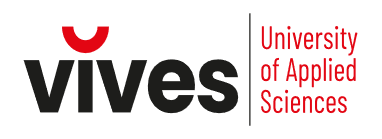<br>

**Dania International Days**<br>
13 - 15 March 2024<br><br>
Workshop by Andy Louwyck

---



---



# **INTRODUCTION TO DEEP LEARNING WITH PYTHON**

## **Simple Linear Regression**

The dataset

In [ ]:
import pandas as pd  # python data analysis library

df = pd.read_excel('age_couple.xlsx')
df.head()

In [ ]:
df.describe().T  # T transposes the table

In [ ]:
import matplotlib.pyplot as plt  # python library for visualizations

df.plot.scatter(x="Husband's age", y="Wife's age");
plt.grid();

In [ ]:
# independent and dependent variable

X = df[[df.columns[1]]]   # husband's age
y = df[[df.columns[-1]]]  # wife's age

Use Scikit-Learn to apply OLS

In [ ]:
from sklearn.linear_model import LinearRegression

exact = LinearRegression()
exact.fit(X, y)
m, b = exact.coef_[0][0], exact.intercept_[0]
m, b

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

yp = exact.predict(X)
print("MSE is", mean_squared_error(y_true=y, y_pred=yp))
print("MAE is", mean_absolute_error(y_true=y, y_pred=yp))
print("R² is", r2_score(y_true=y, y_pred=yp))

Use Keras to apply SGD

In [ ]:
from tensorflow import keras  # keras is tensorflow's high-level API!

model = keras.Sequential()  # instantiate Sequential
model.add(keras.layers.Dense(units=1))  # add 1 layer with 1 unit or node

In [ ]:
model.compile(loss="mse",       # MSE
              optimizer="sgd")  # Stochastic Gradient Descent

In [ ]:
result = model.fit(X, y,
                   epochs=15);  # number of times the algorithm processes the training set

We need to normalize X!

In [ ]:
# feature scaling!
Xn = X / 100
yn = y / 100

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1))
model.compile(optimizer="rmsprop",  # a variant of SGD that is more robust
              loss="mse")
result = model.fit(Xn, yn,
                   epochs=5000,  # we need a lot of epochs to reach the minimum
                   verbose=0);   # suppress output

In [ ]:
plt.plot(result.history['loss']);
plt.grid();
plt.xlabel('epoch');
plt.ylabel('MSE');

In [ ]:
m2, b2 = tuple(model.layers[0].weights)
m2 = m2.numpy().squeeze().item()
b2 = b2.numpy().squeeze().item()
m2, b2  # different result because of feature scaling

In [ ]:
yp = model.predict(Xn) * 100  # multiply by 100 to undo the scaling!

In [ ]:
print("MSE is", mean_squared_error(y_true=y, y_pred=yp))
print("MAE is", mean_absolute_error(y_true=y, y_pred=yp))
print("R² is", r2_score(y_true=y, y_pred=yp))

In [ ]:
import numpy as np  # numeric python

# scatter plot
df.plot.scatter(x=df.columns[1], y=df.columns[-1]);
plt.grid();

# exact regression line
xline = np.array([0, 100])
yline = m * xline + b  # y = mx + b
plt.plot(xline, yline, 'r-', label='exact');

# approximate regression line
xline = np.array([0, 1])
yline = m2 * xline + b2
plt.plot(xline * 100, yline * 100, 'k:', label='approximate');  # don't forget to scale back!
plt.legend();

## **Logistic Regression**

The sigmoid function

In [ ]:
import numpy as np

x = np.linspace(-10, 10, 100)  # create array of 100 evenly spaced points between -10 and 10
sigmoid = lambda x: 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x), 'k-');
plt.grid();
plt.title('sigmoid function');
plt.xlabel('x');
plt.ylabel('y');

The dataset

In [ ]:
import pandas as pd

df = pd.read_csv('Student_Passed.csv')
df.head()

In [ ]:
df.describe().T

In [ ]:
df.passed.sum()  #  balanced dataset!

In [ ]:
from matplotlib import pyplot as plt

def students_scatterplot(df):
    _, ax = plt.subplots(1, 1)
    df[df.passed==1].plot.scatter(x="time_study", y="number_courses", color="green", ax=ax);
    df[df.passed==0].plot.scatter(x="time_study", y="number_courses", color="red", ax=ax);
    plt.grid();
    return ax

students_scatterplot(df);

In [ ]:
# feature and labels

X = df[['time_study', 'number_courses']].values  # features
y = df['passed'].values  # labels

Use Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty=None)
reg.fit(X, y)
reg.score(X, y)  # accuracy

In [ ]:
students_scatterplot(df)
xline = np.array([0, 8])
yline = -(reg.intercept_.item() + reg.coef_[0][0] * xline) / reg.coef_[0][1]
xl, yl = plt.xlim(), plt.ylim()
plt.plot(xline, yline, 'b-');
plt.xlim(xl);
plt.ylim(yl);

Use Keras

In [ ]:
Xn = X / 8             # feature scaling! divide all features by the maximum value of 8
yn = y.reshape(-1, 1)  # reshape 1D vector y so it becomes a 2D column vector

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1,  # one node only
                             activation='sigmoid'))  # sigmoid as activation function

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
result = model.fit(Xn, yn,
                   epochs=1000,
                   batch_size=64,
                   verbose=0)  # no output

In [ ]:
def plot_loss_accuracy(result):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(result.history['loss']);
    ax1.grid();
    ax1.set_ylabel('Log Loss');
    ax2.plot(result.history['accuracy']);
    ax2.grid();
    ax2.set_ylabel('Accuracy');
    ax2.set_xlabel('Epochs');
    return ax1, ax2

plot_loss_accuracy(result);

In [ ]:
loss, acc = tuple(model.evaluate(Xn, yn))
print('Log Loss:', loss)
print('Accuracy:', acc)

Set learning rate to a higher value!

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
optimizer = keras.optimizers.RMSprop(learning_rate=0.1)  # by default, the learning rate is 0.001
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
result = model.fit(Xn, yn, epochs=1000, batch_size=64, verbose=0)

In [ ]:
plot_loss_accuracy(result);

In [ ]:
loss, acc = tuple(model.evaluate(Xn, yn))
print('Log Loss:', loss)
print('Accuracy:', acc)

## **Predicting House Prices**

The dataset

In [ ]:
from keras.datasets import boston_housing  # Boston housing dataset

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [ ]:
print(train_data.shape)  # 404 samples, 13 features
print(test_data.shape)  # 102 samples, 13 features

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.hist(train_labels);
ax1.set_ylabel('training set');
ax2.hist(test_labels);
ax2.set_xlabel('median house price (1000$)');
ax2.set_ylabel('test set');

Normalizing the data!

In [ ]:
mean = train_data.mean(axis=0)  # mean
std = train_data.std(axis=0)  # standard deviation
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

The ReLU activation function

In [ ]:
# ReLU as activation function
import numpy as np

relu = lambda x: np.maximum(x, 0)

x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x), 'k-');
plt.title('ReLU function');
plt.xlabel('x');
plt.ylabel('y');
plt.grid();

The neural network

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # regression so no activation in output layer
])

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [ ]:
result = model.fit(
    train_data, train_labels,
    epochs=500,
    batch_size=16,
    validation_split=0.1,  # keep 10% of training data for validation!
    verbose=0
  )

In [ ]:
plt.semilogy(result.history['loss'], label='training');
plt.semilogy(result.history['val_loss'], label='validation');
plt.legend();
plt.grid();
plt.xlabel('epoch');
plt.ylabel('MSE');

Avoid overfitting!

In [ ]:
# build
model = keras.Sequential([
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # regression so no activation in output layer
])

# compile
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# train
result = model.fit(
    train_data, train_labels,
    epochs=300,
    batch_size=16,
    verbose=0
  )

Evaluating the model

In [ ]:
mse, mae = tuple(model.evaluate(train_data, train_labels, verbose=0))
print('TRAINING SET')
print("  MSE =", mse)
print("  MAE =", mae)

mse, mae = tuple(model.evaluate(test_data, test_labels, verbose=0))
print('TEST SET')
print("  MSE =", mse)
print("  MAE =", mae)

In [ ]:
from sklearn.metrics import r2_score

yp_train = model.predict(train_data, verbose=0)
print('Training R² is', r2_score(y_true=train_labels, y_pred=yp_train))

yp_test = model.predict(test_data, verbose=0)
print('Test R² is', r2_score(y_true=test_labels, y_pred=yp_test))

## **Text Classification**

What is vectorization?

In [ ]:
docs = ['The cat sat on the mat.',
        'When the cat is away, the mice will play!']
docs

In [ ]:
# standarization

import re  # module for regular expressions

docs = [doc.lower() for doc in docs]  # lower case
docs = [re.sub(r'[^\w\s]', '', doc) for doc in docs]  # remove punctuations
docs

In [ ]:
# tokenization
docs = [doc.split(" ") for doc in docs]
docs

In [ ]:
# vocabulary {word: index}

unique_words = set([word for doc in docs for word in doc])
vocabulary = {word: id for id, word in enumerate(unique_words)}
vocabulary

In [ ]:
# text to integer vectors
samples = [[vocabulary[word] for word in doc] for doc in docs]
samples

In [ ]:
# multi-hot encoding
import numpy as np

X = np.zeros((len(samples), len(vocabulary)), dtype=int)
for i, sample in enumerate(samples):
    X[i, sample] = 1
X

In [ ]:
import pandas as pd
pd.DataFrame(columns=vocabulary.keys(), data=X)

The dataset

In [ ]:
from keras.datasets import imdb  # the IMDB dataset

num_words = 10_000  # restrict to the 10 000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

In [ ]:
print(train_data.shape)
print(test_data.shape)

In [ ]:
# labels are 1 (=positive) or 0 (=negative)

train_labels[0]  # label of the first review

In [ ]:
# the data have already been vectorized

train_data[0][:10]  # the first 10 words from the first review

In [ ]:
# the vocabulary is limited to 10 000 words

print(max([max(review) for review in train_data]))
print(max([max(review) for review in test_data]))

In [ ]:
# get the words
word_index = imdb.get_word_index()  # dict {word=index}
reverse_word_index = {index: value for value, index in word_index.items()} # we want dict {index=word}
" ".join([reverse_word_index[i] for i in train_data[0][:50]])  # first 50 words of first sample

In [ ]:
# apply multi-hot encoding

def multi_hot(data):
    x = np.zeros((len(data), num_words))
    for i, review in enumerate(data):
        x[i, review] = 1.
    return x

x_train = multi_hot(train_data)
x_test = multi_hot(test_data)

In [ ]:
# convert labels to single precision floats
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

The neural net

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

The validation set

In [ ]:
# create validation set

n = 10_000
x_val = x_train[:n]
partial_x_train = x_train[n:]
y_val = y_train[:n]
partial_y_train = y_train[n:]

In [ ]:
result = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=15,
    batch_size=512,
    validation_data=(x_val, y_val)  # validation set
)

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

epochs = range(1, len(result.history['loss']) + 1)
ax1.plot(epochs, result.history['loss'], "b-", label="Training");
ax1.plot(epochs, result.history['val_loss'], "r-", label="Validation");
ax1.set_ylabel('Loss');
ax1.grid();

ax2.plot(epochs, result.history['accuracy'], "b-", label="Training");
ax2.plot(epochs, result.history['val_accuracy'], "r-", label="Validation");
ax2.set_xlabel('Epochs');
ax2.set_ylabel('Accuracy');
ax2.grid();
ax2.legend();

Avoid overfitting!

In [ ]:
# build
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

# compile
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# fit
result = model.fit(
    x_train,   # full training set!
    y_train,
    epochs=4,  # 4 instead of 20!!
    batch_size=512,
)

Evaluating the model

In [ ]:
# evaluate model
loss, acc = tuple(model.evaluate(x_test, y_test))
print('Log Loss:', loss)
print('Accuracy:', acc)

In [ ]:
# the model predicts probabilities!

prob = model.predict(x_test, verbose=0)
prob

In [ ]:
# use round() to convert probabilities into labels!
yp = np.round(prob)
yp

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=yp,
                                        normalize='all',
                                        display_labels=('neg', 'pos'),  # labels for 0 and 1
                                        colorbar=False);  # no colorbar

## **Image Classification**

The dataset

In [ ]:
from keras.datasets import mnist  # the MNIST dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(f"The training set constains {len(train_images)} images")
print(f"The test set contains {len(test_images)} images")

In [ ]:
import matplotlib.pyplot as plt

digit = train_images[4]  # 5th image (index 4!)
plt.imshow(digit, cmap=plt.cm.binary)  # plot image
plt.title(f"Label: {train_labels[4]}");  # label for 5th image

In [ ]:
type(digit)

In [ ]:
digit.shape

In [ ]:
digit.dtype

In [ ]:
digit.min(), digit.max()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))  # reshape
train_images = train_images.astype("float32") / 255  # normalize and convert to float
test_images = test_images.reshape((10000, 28 * 28))  # reshape
test_images = test_images.astype("float32") / 255  # normalize and convert to float

Our own hand-written digit

In [ ]:
# own hand written digit
import PIL
digit = PIL.Image.open("digit.png")  # read image
digit = digit.resize((28, 28))  # resize image to 28 x 28
digit = digit.convert('L')  # convert image to black and white (L = luminance)
digit = np.array(digit)  # convert image to numpy array
digit = 255 - digit  # turn black into whihte and white in to black
digit = digit.astype("float32") / 255.0  # normalize array
plt.imshow(digit, cmap=plt.cm.binary);  # plot digit

A fully connected network

In [ ]:
# a fully connected neural net

from tensorflow import keras

model = keras.Sequential([
 keras.layers.Dense(512, activation="relu"),  # hidden layer consisting of 512 neurons and relu as activation
 keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28 * 28))  # number of neurons for the input layer
model.summary()

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function that calculates difference between predicted and true labels
    optimizer="rmsprop",  # algorithm that minimizes the loss function
    metrics=["accuracy"]  # calculate accuracy after each iteration (epoch)
  )

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);  # training the model using the training set

Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  # evaluate model using the test set
print(f"accuracy on the test set: {test_acc}")

Our own digit

In [ ]:
probs = model.predict(digit.reshape(1, -1))  # predict returns 10 probabilities
probs[0]

In [ ]:
prob = np.max(probs) * 100  # largest probability
n = np.argmax(probs)  # index (= digit) corresponding to the largest probability
print(f"The neural network is for {prob:.2f} % sure the digit is {n}!")

Convolutional network

In [ ]:
# convolutional neural net

model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28, 28, 1))  # input consists of images of 28 x 28 pixels en 1 color channel
model.summary()

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function
    optimizer="rmsprop",  # optimizer
    metrics=["accuracy"]  # accuracy as metric
  )

In [ ]:
# a convnet processes images!

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64);

Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"accuracy on the test set: {test_acc}")

Our own digit

In [ ]:
probs = model.predict(digit[np.newaxis, :, :])  # add extra dimension!
prob = np.max(probs) * 100
n = np.argmax(probs)
print(f"The convnet is for {prob:.2f} % sure that the digit is {n}!")